Assignment 2: Gradient Descent
==============================


Microsoft Forms Document: https://forms.office.com/r/kkt8SK1HA8

The loss function is manually defined as $\mathcal J_{\vec w}=w_0^2 + w_1^2 + 20 \sin(w_0) \cos(w_1)$.
The weights $\vec w = (w_0, w_1)^T$ shall be optimized such that the loss function has a minimum.


Task 1: Compute the Gradient
----------------------------

The gradient is defined as the partial derivatives of the loss function with respect to the two variables $w_0$ and $w_1$.
We need to calculate it:

对 $w_0$ 求偏导 = $2w_0 + 20cos(w_0)cos(w_1)$

对 $w_1$ 求偏导 = $2w_1 - 20sin(w_0)sin(w_1)$

Task 2: Implement the Loss Function
-----------------------------------


In [1]:
import numpy as np
# 假装这个式子是 loss function 目标是找到这个式子的最小值点
def loss(w):
    return w[0]**2 + w[1]**2 + 20*np.sin(w[0])*np.cos(w[1])
#**两个星号代表幂^,sin一定要在np的库中才能用，w是有w1和w2的vector

Task 3: Implement the Gradient
------------------------------
Remeber that the gradient needs to be computed and returned for both $w_0$ and $w_1$.

In [2]:
def gradient(w):
    g_w = np.copy(w)
    # 这里错了！！！！！注意copy之后，该用什么计算梯度，应该用原来的 w ！！！
    #或者用grad = np.ndarray(2, dtype = 'float')，就是定义一个和w里面个数一样的g_w,然后填数
#np.ndarray(shape=(2,2), dtype=float, order='F')
    g_w[0] = 2*w[0] + 20*np.cos(w[0])*np.cos(w[1])
    g_w[1] = 2*w[1] - 20*np.sin(w[0])*np.sin(w[1])
    return g_w

Test 1: Test Functions
----------------------
Test the two functions defined in the task above with $\vec w = (0,0)^T$ . What should be the expected outcomes?

In [3]:
w = np.zeros(2)

# analytically compute the expected values
expected_loss = 0
expected_gradient = np.array([20,0])

# test loss function
assert abs(loss(w) - expected_loss) < 1e-8
# np.all 返回boolean
assert np.all(np.abs(gradient(w) - expected_gradient) < 1e-8)

Gradient descent is an iterative algorithm that requires to define a proper stopping criterion.
There are several possibilities.
Chose at least one.

Task 4: Termination Criterion
-----------------------------

- fixed number of iteration
- little change in loss
- gradient near 0

<img src="convergence_criteria.png" width=50%>

<img src="adaptive_learning_rate.png" width=50%>


Task 5: Implement Gradient Descent
----------------------------------

We want to implement a function that performs gradient descent.
We want this function to be very flexible, hence the functions to compute the gradient and the loss are provided as parameters.

In [4]:
def gradient_descent(w, eta=0.01):
    # copy the weights to not modify the original values
    w_star = w.copy()
    g_w = gradient(w_star)
    i = 0

    # perform iterative gradient descent
    while (i < 1000) and np.linalg.norm(g_w) > 1e-5:
        # compute the gradient
        loss_1 = loss(w_star)
        g_w = gradient(w_star)
        # update the weights
        w_star = w_star - eta*g_w
        
        # apply adaptive learning rate
        loss_2 = loss(w_star)
        delta_loss = loss_2 - loss_1
        if (delta_loss < 0):
            eta *= 1.1
        else:
            eta *= 0.5
            
        i += 1
        
    return w_star

Task 6: Evaluate Gradient Descent
---------------------------------

We call gradient descent 1000 times with different random values for $\vec w\in[-20,20]^2$ and a learning rate of $\eta=0.01$. Store the resulting weight vectors.

In [5]:
stored_weights = []

for i in range(1000):
  # create random weight vector
  w = np.random.uniform(-20,20, size=(2,))
  # call gradient descent
  w_star = gradient_descent(w)
  # store it in the list
  stored_weights.append(w_star)

Test 2: Check Minima
--------------------

Counting the number of local minima in our loss function, we reach a total of 16. Make sure that the number of minima that are reached is not higher than that!

In [6]:
maximum_number_of_minima = 16

minima = []

for w in stored_weights:
    if all(np.linalg.norm(np.abs(x-w)) > 0.001 for x in minima):
        minima.append(w)

## 或者也可以用 np.unique(np.round(w,1),axis=0) 的方式！！！ ===> 一定要记得 np.round()的精确度, 和np.unique() 的 axis （不然不会按行比较）
## print(np.unique(np.round(np_stored_weights, 1), axis=0))  

number_of_reached_minima = len(minima)
print(len(minima))

assert number_of_reached_minima <= maximum_number_of_minima

16


Task 7: Find global minimum
---------------------------
From the 1000 result vectors, select the one with the minimum loss and print both of them.

In [7]:
all_loss = [loss(w) for w in stored_weights]

minimum_loss = np.min(all_loss)
# 用 np 切片之前，需要把对象改为 np.array 对象！！！
minimum_weights = np.array(stored_weights)[all_loss == minimum_loss][0]

## 或者用这种方法取index也可以，但是略显笨拙
print(stored_weights[np.where(all_loss == minimum_loss)[0][0]])

print("The minimum loss value of:", minimum_loss, "was found for minimum", minimum_weights)

[-1.42755177e+00  4.76005371e-09]
The minimum loss value of: -17.75725653147415 was found for minimum [-1.42755177e+00  4.76005371e-09]


Task 8: Loss Surface Plot
-------------------------

Plot the loss surface and the optimized points into the same 3D plot.
Chose the range for $w_0$ and $w_1$ to be in $[-10,10]$.

When plotting the resulting optimized weights $\vec w=(w_0, w_1)^T$, we need to define the third coordinate. What should this coordinate be?


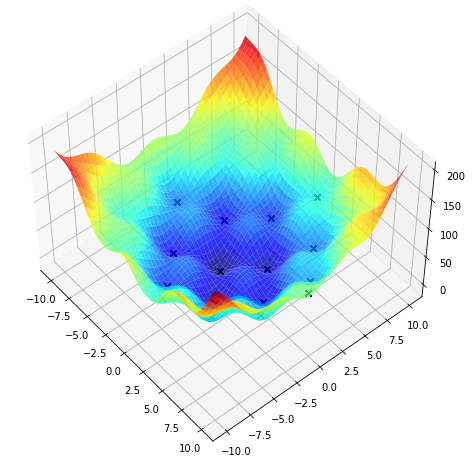

In [8]:
from matplotlib import pyplot

# create 3D axis
figure = pyplot.figure(figsize=(8,8))
axis = figure.add_subplot(111, projection='3d', azim = -40, elev=50)

# define range to plot
w_range = np.linspace(-10, 10, 200)
w0, w1 = np.meshgrid(w_range,w_range)

# compute loss for w0 and w1
J = loss([w0,w1])

# plot surface with jet colormap
# cmap="jet" 是彩色样式
axis.plot_surface(w0, w1, J, cmap="jet", alpha=0.8)

# plot resulting points in 3D
for w_star in stored_weights:
    # compute the z-position)
    z = loss(w_star)
    # plot as 3D point
    axis.plot([w_star[0]], [w_star[1]], [z], "kx-")